

*   Họ và tên: Võ Đức Trọng
*   MSSV: 19110494




In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [72]:
#Loading a dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [14]:
#Check số lượng labels
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


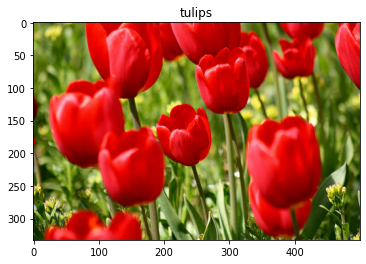

In [20]:
#Show thử một số ảnh. ra
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [35]:
# Hàm show nhiều ảnh.
def ShowImage(list_image,list_label=None):
    if list_label==None:
        list_label=[]
        for i in range(len(list_image)):
            list_label.append('image'+str(i+1))
    n = len(list_image)
    cols = 3
    rows = n//cols
    if(n% cols != 0):
        rows = rows +1
    fig = plt.figure(figsize=(cols*8,rows*5))
    for i in range(n):
        fig.add_subplot(rows, cols, i+1)
        image = list_image[i]
        plt.imshow(image,plt.cm.gray)
        plt.title("Label "+str(list_label[i]))
    plt.show()

In [36]:
IMG_SIZE = 180
#Định nghĩa hàm resizing và rescaling
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.Rescaling(1./255)
])

In [86]:
#Định nghĩa 2 augmentations là random flip và random random rotation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [88]:
batch_size = 128
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [89]:
train_ds_1 = prepare(train_ds, shuffle=True, augment=True)
val_ds_1 = prepare(val_ds)
test_ds_1 = prepare(test_ds)

In [44]:
image, label = next(iter(train_ds))
images = list()
labels = list()
for i in range(9):
  images.append(image[i])
  labels.append(get_label_name(label[i]))

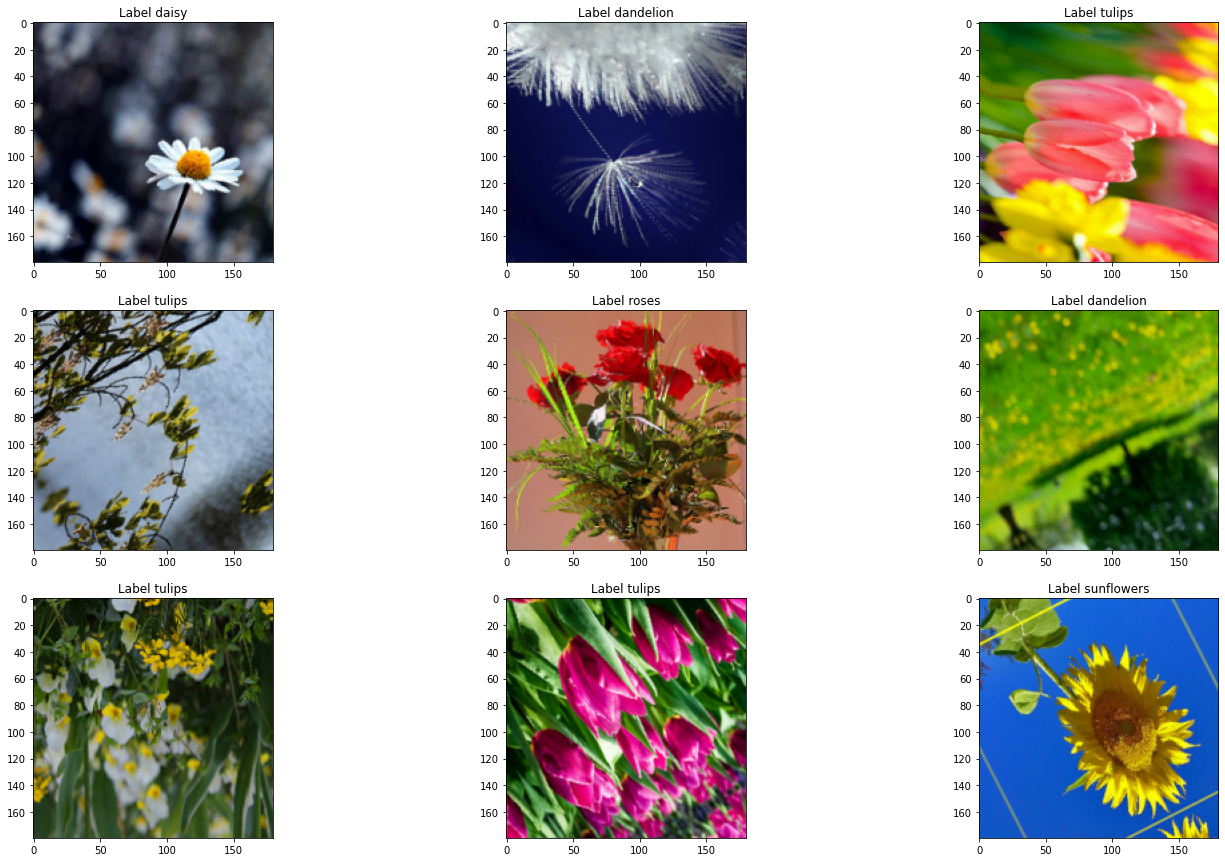

In [45]:
ShowImage(images,labels)

# CNN

In [90]:
def create_model_CNN():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
  ])
  return model


In [91]:
model= create_model_CNN()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [92]:
epochs=5
history = model.fit(
  train_ds_1,
  validation_data=val_ds_1,
  epochs=epochs
)

Epoch 1/5
23/23 [==============================] - 15s 611ms/step - loss: 1.7750 - accuracy: 0.2677 - val_loss: 1.4503 - val_accuracy: 0.3052
Epoch 2/5
23/23 [==============================] - 10s 409ms/step - loss: 1.3184 - accuracy: 0.4373 - val_loss: 1.2393 - val_accuracy: 0.5150
Epoch 3/5
23/23 [==============================] - 11s 416ms/step - loss: 1.1919 - accuracy: 0.4969 - val_loss: 1.1824 - val_accuracy: 0.5422
Epoch 4/5
23/23 [==============================] - 11s 415ms/step - loss: 1.1079 - accuracy: 0.5497 - val_loss: 1.0862 - val_accuracy: 0.5886
Epoch 5/5
23/23 [==============================] - 10s 412ms/step - loss: 1.0624 - accuracy: 0.5674 - val_loss: 1.0537 - val_accuracy: 0.6022


In [93]:
model.evaluate(test_ds_1)

3/3 [==============================] - 0s 95ms/step - loss: 1.0510 - accuracy: 0.5531


[1.05100679397583, 0.553133487701416]

# Hãy thêm một số phương pháp augmentations khác cho model, có thể tìm hiểu các augmentations sau của tf.keras.layers:

## tf.keras.layers.RandomContrast

In [59]:

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomContrast(factor=0.2)
])

In [76]:
train_ds_2 = prepare(train_ds, shuffle=True, augment=True)

In [77]:
model= create_model_CNN()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=5
history = model.fit(
  train_ds_2,
  validation_data=val_ds_1,
  epochs=epochs
)

Epoch 1/5
23/23 [==============================] - 14s 494ms/step - loss: 1.9126 - accuracy: 0.2292 - val_loss: 1.5608 - val_accuracy: 0.2589
Epoch 2/5
23/23 [==============================] - 11s 414ms/step - loss: 1.4470 - accuracy: 0.3917 - val_loss: 1.3077 - val_accuracy: 0.5041
Epoch 3/5
23/23 [==============================] - 14s 567ms/step - loss: 1.2626 - accuracy: 0.4816 - val_loss: 1.0840 - val_accuracy: 0.5804
Epoch 4/5
23/23 [==============================] - 11s 423ms/step - loss: 1.0683 - accuracy: 0.5746 - val_loss: 1.0311 - val_accuracy: 0.6049
Epoch 5/5
23/23 [==============================] - 10s 415ms/step - loss: 1.0070 - accuracy: 0.5957 - val_loss: 0.9925 - val_accuracy: 0.6131


In [78]:
model.evaluate(test_ds_1)

3/3 [==============================] - 1s 184ms/step - loss: 0.9586 - accuracy: 0.6185


[0.9586176872253418, 0.6185286045074463]

## tf.keras.layers.RandomCrop

In [110]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomCrop(height=180, width=180)
])

In [111]:
train_ds_3 = prepare(train_ds, shuffle=True, augment=True)

In [112]:
model= create_model_CNN()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=5
history = model.fit(
  train_ds_3,
  validation_data=val_ds_1,
  epochs=epochs
)

Epoch 1/5
23/23 [==============================] - 4s 119ms/step - loss: 1.5820 - accuracy: 0.3103 - val_loss: 1.4048 - val_accuracy: 0.3460
Epoch 2/5
23/23 [==============================] - 3s 116ms/step - loss: 1.2200 - accuracy: 0.4799 - val_loss: 1.0694 - val_accuracy: 0.5668
Epoch 3/5
23/23 [==============================] - 3s 114ms/step - loss: 1.0031 - accuracy: 0.5892 - val_loss: 1.0242 - val_accuracy: 0.6022
Epoch 4/5
23/23 [==============================] - 3s 115ms/step - loss: 0.8890 - accuracy: 0.6482 - val_loss: 0.9397 - val_accuracy: 0.6240
Epoch 5/5
23/23 [==============================] - 3s 115ms/step - loss: 0.7616 - accuracy: 0.7125 - val_loss: 0.9582 - val_accuracy: 0.6431


In [113]:
model.evaluate(test_ds_1)

3/3 [==============================] - 0s 86ms/step - loss: 0.8669 - accuracy: 0.6403


[0.8669319748878479, 0.640326976776123]

## tf.keras.layers.RandomTranslatio

In [101]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomTranslation(height_factor=(-0.2, 0.3),width_factor=(-0.2, 0.3))
])

In [102]:
train_ds_4 = prepare(train_ds, shuffle=True, augment=True)

In [103]:
model= create_model_CNN()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=5
history = model.fit(
  train_ds_4,
  validation_data=val_ds_1,
  epochs=epochs
)

Epoch 1/5
23/23 [==============================] - 10s 379ms/step - loss: 1.5971 - accuracy: 0.3154 - val_loss: 1.3401 - val_accuracy: 0.4932
Epoch 2/5
23/23 [==============================] - 10s 396ms/step - loss: 1.2928 - accuracy: 0.4629 - val_loss: 1.1171 - val_accuracy: 0.5858
Epoch 3/5
23/23 [==============================] - 10s 392ms/step - loss: 1.1663 - accuracy: 0.5187 - val_loss: 1.1197 - val_accuracy: 0.5722
Epoch 4/5
23/23 [==============================] - 10s 390ms/step - loss: 1.1254 - accuracy: 0.5484 - val_loss: 0.9921 - val_accuracy: 0.6349
Epoch 5/5
23/23 [==============================] - 10s 391ms/step - loss: 1.0686 - accuracy: 0.5722 - val_loss: 1.0266 - val_accuracy: 0.6376


In [104]:
model.evaluate(test_ds_1)

3/3 [==============================] - 1s 185ms/step - loss: 1.0558 - accuracy: 0.5640


[1.0557705163955688, 0.5640326738357544]

#  2. Hãy thay model VGG16 thành VGG19 và train thử

In [94]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
#Chạy cái create_model_notAugment
#import keras_efficientnet_v2
def create_model():
    pretrained_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False)
    last_output = pretrained_model.output
    x = GlobalAveragePooling2D()(last_output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(250, activation='relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(100, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=pretrained_model.input, outputs=outputs)

    return model
model = create_model()
MC=tf.keras.callbacks.ModelCheckpoint(
    "best.hdf5",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True, 
    verbose=1
)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [95]:
epochs=5
history = model.fit(
  train_ds_1,
  validation_data=val_ds_1,
  epochs=epochs, 
  callbacks=[MC]
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - ETA: 0s - loss: 2.0783 - accuracy: 0.2067
Epoch 1: val_accuracy improved from -inf to 0.24251, saving model to best.hdf5
23/23 [==============================] - 42s 2s/step - loss: 2.0783 - accuracy: 0.2067 - val_loss: 1.5996 - val_accuracy: 0.2425
Epoch 2/5
23/23 [==============================] - ETA: 0s - loss: 1.6058 - accuracy: 0.2534
Epoch 2: val_accuracy did not improve from 0.24251
23/23 [==============================] - 40s 2s/step - loss: 1.6058 - accuracy: 0.2534 - val_loss: 1.5950 - val_accuracy: 0.2425
Epoch 3/5
23/23 [==============================] - ETA: 0s - loss: 1.5957 - accuracy: 0.2612
Epoch 3: val_accuracy improved from 0.24251 to 0.40599, saving model to best.hdf5
23/23 [==============================] - 40s 2s/step - loss: 1.5957 - accuracy: 0.2612 - val_loss: 1.5393 - val_accuracy: 0.4060
Epoch 4/5
23/23 [==============================] - ETA: 0s - loss: 1.4801 - accuracy: 0.3372
Epoch 4: val_accuracy improved from 0.4

In [96]:
model.evaluate(test_ds_1)

3/3 [==============================] - 1s 445ms/step - loss: 1.2921 - accuracy: 0.3733


[1.2920641899108887, 0.3732970058917999]

# 3. so sánh kết quả của việc freezing và unfreezing

In [97]:
def create_model():
  
    pretrained_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False)
    pretrained_model.trainable = False
    last_output = pretrained_model.output
    x = GlobalAveragePooling2D()(last_output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(250, activation='relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(100, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=pretrained_model.input, outputs=outputs)

    return model
model = create_model()
MC=tf.keras.callbacks.ModelCheckpoint(
    "best.hdf5",
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True, 
    verbose=1
)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
epochs=5
history = model.fit(
  train_ds_1,
  validation_data=val_ds_1,
  epochs=epochs, 
  callbacks=[MC]
)

Epoch 1/5
23/23 [==============================] - ETA: 0s - loss: 1.4430 - accuracy: 0.3822
Epoch 1: val_accuracy improved from -inf to 0.53678, saving model to best.hdf5
23/23 [==============================] - 22s 896ms/step - loss: 1.4430 - accuracy: 0.3822 - val_loss: 1.1405 - val_accuracy: 0.5368
Epoch 2/5
23/23 [==============================] - ETA: 0s - loss: 1.0505 - accuracy: 0.5869
Epoch 2: val_accuracy improved from 0.53678 to 0.65940, saving model to best.hdf5
23/23 [==============================] - 21s 878ms/step - loss: 1.0505 - accuracy: 0.5869 - val_loss: 0.8834 - val_accuracy: 0.6594
Epoch 3/5
23/23 [==============================] - ETA: 0s - loss: 0.8819 - accuracy: 0.6669
Epoch 3: val_accuracy improved from 0.65940 to 0.74659, saving model to best.hdf5
23/23 [==============================] - 21s 885ms/step - loss: 0.8819 - accuracy: 0.6669 - val_loss: 0.7023 - val_accuracy: 0.7466
Epoch 4/5
23/23 [==============================] - ETA: 0s - loss: 0.7676 - accura

In [99]:
model.evaluate(test_ds_1)

3/3 [==============================] - 2s 467ms/step - loss: 0.6292 - accuracy: 0.7629


[0.6291714906692505, 0.7629427909851074]

**Nhận Xét**: Ta thấy việc Freezing pre-trained model giúp cho model có kết quả tốt hơn, một phần do weight của pre-trained model đã được tốt ưu nên việc cập nhật lại weight của pre-trained model có thể dẫn đến việc model đi ra khỏi các điểm tối ưu. Thời gian train cũng nhanh hơn do không phải cập nhật các trọng số của pre-trained model. 